# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [14]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [15]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [16]:
batch_size = 100
max_epoch = 10
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

hidden_layer1=128
hidden_layer2=64
disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [17]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [18]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, hidden_layer1))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [19]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 26.5186	 Accuracy 0.1100
Epoch [0][10]	 Batch [50][550]	 Training Loss 7.6214	 Accuracy 0.0957
Epoch [0][10]	 Batch [100][550]	 Training Loss 4.5222	 Accuracy 0.0906
Epoch [0][10]	 Batch [150][550]	 Training Loss 3.4299	 Accuracy 0.0928
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.8705	 Accuracy 0.0989
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.5267	 Accuracy 0.1047
Epoch [0][10]	 Batch [300][550]	 Training Loss 2.2928	 Accuracy 0.1093
Epoch [0][10]	 Batch [350][550]	 Training Loss 2.1247	 Accuracy 0.1135
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.9945	 Accuracy 0.1188
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.8923	 Accuracy 0.1238
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.8068	 Accuracy 0.1296

Epoch [0]	 Average training loss 1.7367	 Average training accuracy 0.1356
Epoch [0]	 Average validation loss 0.9962	 Average validation accuracy 0.2088

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.0120	 Accuracy 0.190

In [20]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7342.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [21]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, hidden_layer1))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(hidden_layer1, hidden_layer2))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(hidden_layer2, 10))

In [22]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 9.0191	 Accuracy 0.0900
Epoch [0][10]	 Batch [50][550]	 Training Loss 3.8776	 Accuracy 0.1212
Epoch [0][10]	 Batch [100][550]	 Training Loss 2.9371	 Accuracy 0.1371
Epoch [0][10]	 Batch [150][550]	 Training Loss 2.5121	 Accuracy 0.1533
Epoch [0][10]	 Batch [200][550]	 Training Loss 2.2631	 Accuracy 0.1651
Epoch [0][10]	 Batch [250][550]	 Training Loss 2.0906	 Accuracy 0.1771
Epoch [0][10]	 Batch [300][550]	 Training Loss 1.9587	 Accuracy 0.1908
Epoch [0][10]	 Batch [350][550]	 Training Loss 1.8578	 Accuracy 0.2017
Epoch [0][10]	 Batch [400][550]	 Training Loss 1.7746	 Accuracy 0.2136
Epoch [0][10]	 Batch [450][550]	 Training Loss 1.7042	 Accuracy 0.2237
Epoch [0][10]	 Batch [500][550]	 Training Loss 1.6433	 Accuracy 0.2335

Epoch [0]	 Average training loss 1.5917	 Average training accuracy 0.2432
Epoch [0]	 Average validation loss 1.0281	 Average validation accuracy 0.3800

Epoch [1][10]	 Batch [0][550]	 Training Loss 1.0507	 Accuracy 0.4500

In [23]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7200.



## Plot

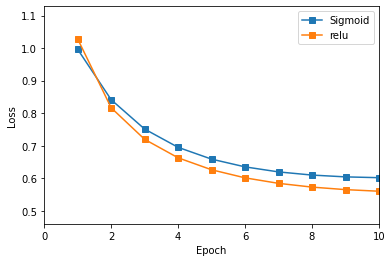

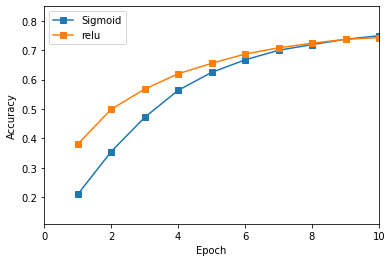

In [24]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [25]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [26]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, hidden_layer1))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(hidden_layer1, hidden_layer2))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(hidden_layer2, 10))

### Train

In [27]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][10]	 Batch [0][550]	 Training Loss 0.8167	 Accuracy 0.1400
Epoch [0][10]	 Batch [50][550]	 Training Loss 0.8018	 Accuracy 0.1125
Epoch [0][10]	 Batch [100][550]	 Training Loss 0.7862	 Accuracy 0.1127
Epoch [0][10]	 Batch [150][550]	 Training Loss 0.7708	 Accuracy 0.1128
Epoch [0][10]	 Batch [200][550]	 Training Loss 0.7544	 Accuracy 0.1142
Epoch [0][10]	 Batch [250][550]	 Training Loss 0.7376	 Accuracy 0.1140
Epoch [0][10]	 Batch [300][550]	 Training Loss 0.7230	 Accuracy 0.1140
Epoch [0][10]	 Batch [350][550]	 Training Loss 0.7072	 Accuracy 0.1143
Epoch [0][10]	 Batch [400][550]	 Training Loss 0.6926	 Accuracy 0.1141
Epoch [0][10]	 Batch [450][550]	 Training Loss 0.6793	 Accuracy 0.1140
Epoch [0][10]	 Batch [500][550]	 Training Loss 0.6659	 Accuracy 0.1136

Epoch [0]	 Average training loss 0.6537	 Average training accuracy 0.1129
Epoch [0]	 Average validation loss 0.5183	 Average validation accuracy 0.1060

Epoch [1][10]	 Batch [0][550]	 Training Loss 0.5050	 Accuracy 0.1400

### Test

In [28]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1135.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [29]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, hidden_layer1))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(hidden_layer1, hidden_layer2))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(hidden_layer2, 10))

In [30]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

MemoryError: bad allocation

In [ ]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

## Plot

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**